In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
import scipy.io
mat=scipy.io.loadmat('./ex3data1.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

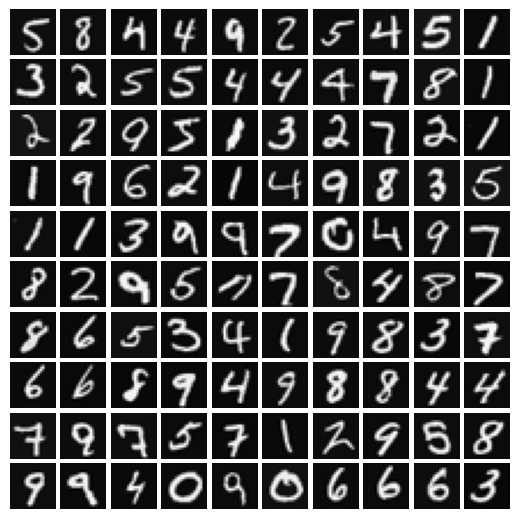

In [4]:
import numpy as np
rows=10
cols=10
fig=plt.figure(figsize=(5,5))
index=np.random.choice(5000,rows*cols)
count=0
for i in range(0,rows):
    for j in range(0,cols):
        ax1=fig.add_subplot(rows,cols,count+1)
        ax1.imshow(mat['X'][index[count]].reshape(20,20).T,cmap='gray')
        ax1.autoscale(False)
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

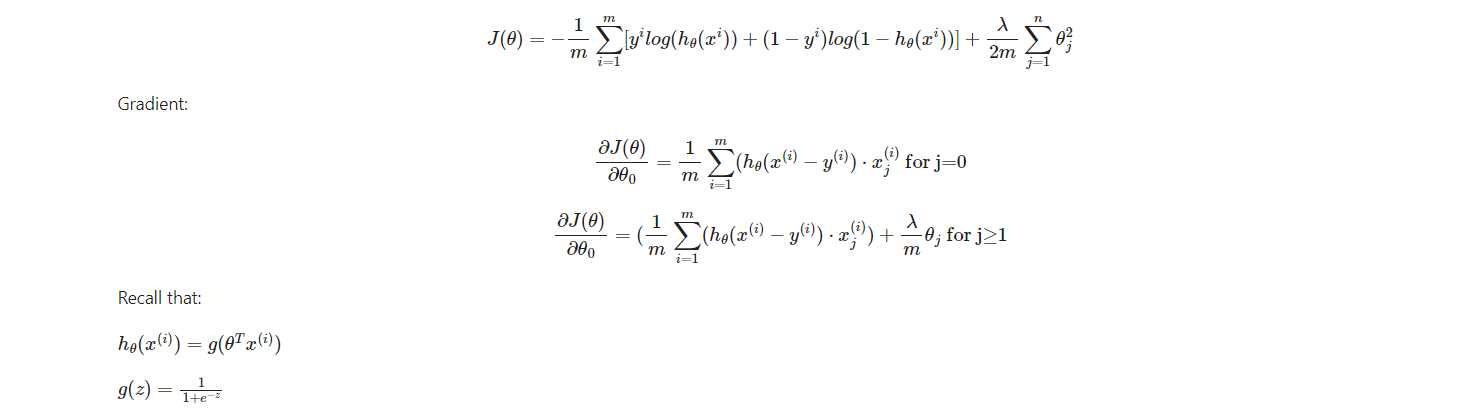

In [6]:
import numpy as np
def sigmoid(z):
    z=np.array(z)
    return 1/(1+np.exp(-z))

In [25]:
def lr_cost_function(theta,X,y,lambda_reg):
    m=y.shape[0]
    theta=theta[:,np.newaxis]
    h=sigmoid(X.dot(theta))
    J=(1/m)*(-y.T.dot(np.log(h))-(1-y).T.dot(np.log(1-h)))+(lambda_reg/(2*m))*np.sum(theta[1:]**2)
    diff=h-y
    grad=(1/m)*diff.T.dot(X)+((lambda_reg/(m))*(theta.T))
    #print(grad)
    grad[0,0]=(1/m)*diff.T.dot(X[:,0])
    return J,grad

In [28]:
#testing cost function
theta=np.array([-2,-1,1,2])
X_t = np.hstack((np.ones((5,1)), (np.arange(1,16).reshape(3,5)).T / 10))
y_t = np.array([1, 0, 1, 0, 1]).reshape(5, -1)
print('Expected cost: 2.534819')
lambda_t = 3
J,grad=lr_cost_function(theta,X_t,y_t,lambda_t)
print("cost ",J)
print("gradient ",grad.T)
print('Expected graient:\n 0.146561\n -0.548558\n 0.724722\n 1.398003')

Expected cost: 2.534819
cost  [[2.5348194]]
gradient  [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]
Expected graient:
 0.146561
 -0.548558
 0.724722
 1.398003


**One Vs All classification**
In our data set k value is 10 but we have code in the way that any value of k will work


In [35]:
import scipy.optimize as opt
#https://docs.scipy.org/doc/scipy/reference/optimize.minimize-tnc.html
def one_vs_all(X, y, num_labels, lambda_reg):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n+1))    
    X = np.hstack((np.ones((m,1)), X))
    
    for i in range(num_labels):
        initial_theta = np.zeros(shape=(n+1))
        opt_results = opt.minimize(lr_cost_function, initial_theta, args=(X, y==i+1, lambda_reg), 
                                   method='TNC', jac=True, options={'maxiter':50})
        all_theta[i, :] = opt_results['x']
        
    return all_theta

**One vs All prediction**

In [41]:
def predict_one_vs_all(all_theta,X):
    m,n=X.shape
    X = np.hstack((np.ones((m,1)),X))
    pred=sigmoid(X.dot(all_theta.T))
    pred_y=np.argmax(pred,axis=1)+1
    return pred_y

In [45]:
lambda_r=0.1
num_labels=10
all_theta=one_vs_all(mat['X'], mat['y'], num_labels, lambda_r)
y_pred=predict_one_vs_all(all_theta,mat['X'])
accuracy=np.mean(y_pred==mat['y'].T)
print("train accuracy:",accuracy*100)

C:\Users\siddh\AppData\Local\Temp\ipykernel_8108\2433021341.py:10: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  opt_results = opt.minimize(lr_cost_function, initial_theta, args=(X, y==i+1, lambda_reg),


train accuracy: 95.14


**Usking sklearn**

In [59]:
from sklearn.linear_model import LogisticRegression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
log_reg=LogisticRegression(solver='newton-cg',max_iter=50,multi_class='ovr')
log_reg.fit(mat['X'],mat['y'].T[0])

LogisticRegression(max_iter=50, multi_class='ovr', solver='newton-cg')

In [62]:
log_reg.score(mat['X'],mat['y'].T[0])

0.9446

**Trainning neural network using forward propogation algorithm**

In [47]:
#Importing dataset
mat_weights = scipy.io.loadmat('./ex3weights.mat')
mat_weights['Theta1'].shape,mat_weights['Theta2'].shape

((25, 401), (10, 26))

**Forward Propogation and Prediction**

In [55]:
def predict(theta1,theta2,X):
    m,n=X.shape
    a1 = np.hstack((np.ones((m,1)),X))
    z2=a1.dot(theta1.T)
    a2=sigmoid(z2)
    z3 = np.hstack((np.ones((m,1)),a2)).dot(theta2.T)
    a3=sigmoid(z3)
    h=np.argmax(a3,axis=1)+1
    return h

In [56]:
y_pred=predict(mat_weights['Theta1'],mat_weights['Theta2'],mat['X'])
accuracy=np.mean(y_pred==mat['y'].T)
print("accuracy: ",accuracy*100)

accuracy:  97.52


**using sklearn**

In [65]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(hidden_layer_sizes=(25,),activation='logistic')
nn.fit(mat['X'],mat['y'].T[0])

C:\Users\siddh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(25,))